In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/ashiv/OneDrive/Desktop/water/groundwater_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Separate features (X) and target variable (y)
features = data.drop('Trihalomethanes', axis=1)
target = data['Trihalomethanes']

# Handle missing values (NaN) using mean imputation
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Convert the target variable to binary (0 or 1)
target_binary = (target > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_binary, test_size=0.2, random_state=42)

# Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = (linear_reg_model.predict(X_test) > 0.5).astype(int)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate accuracy
linear_reg_accuracy = accuracy_score(y_test, linear_reg_predictions) * 100
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions) * 100

# Print the accuracies
print(f"Linear Regression Accuracy: {linear_reg_accuracy:.2f}%")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}%")

# Plot the confusion matrix for Decision Tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Linear Regression Accuracy: 94.66%
Decision Tree Accuracy: 89.63%


         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Linear Regression Accuracy: 94.66%
Decision Tree Accuracy: 89.02%


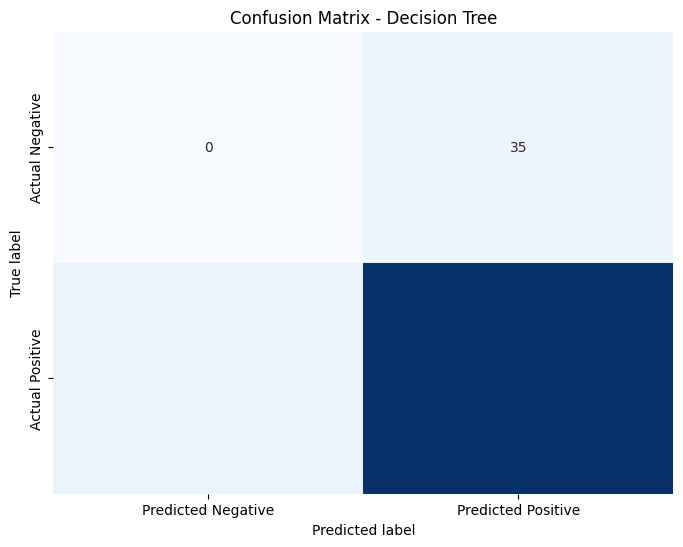

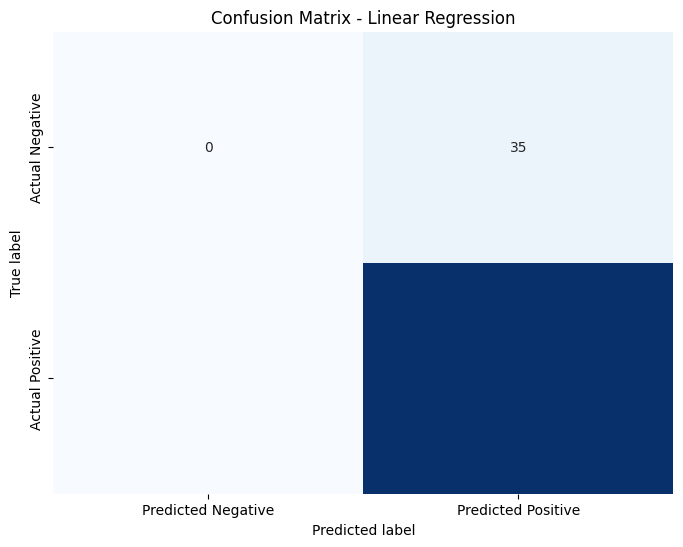

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/ashiv/OneDrive/Desktop/water/groundwater_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Separate features (X) and target variable (y)
features = data.drop('Trihalomethanes', axis=1)
target = data['Trihalomethanes']

# Handle missing values (NaN) using mean imputation
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Convert the target variable to binary (0 or 1)
target_binary = (target > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_binary, test_size=0.2, random_state=42)

# Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = (linear_reg_model.predict(X_test) > 0.5).astype(int)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate accuracy
linear_reg_accuracy = accuracy_score(y_test, linear_reg_predictions) * 100
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions) * 100

# Print the accuracies
print(f"Linear Regression Accuracy: {linear_reg_accuracy:.2f}%")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}%")

# Plot the confusion matrix for Decision Tree
conf_matrix_decision_tree = confusion_matrix(y_test, decision_tree_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot the confusion matrix for Linear Regression
conf_matrix_linear_reg = confusion_matrix(y_test, linear_reg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Linear Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Linear Regression Accuracy: 94.66%
Decision Tree Accuracy: 89.02%


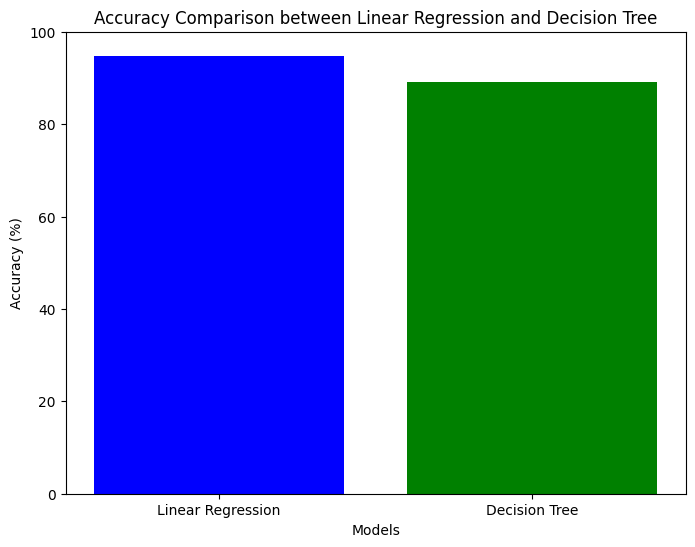

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/ashiv/OneDrive/Desktop/water/groundwater_data.csv')

# Separate features (X) and target variable (y)
features = data.drop('Trihalomethanes', axis=1)
target = data['Trihalomethanes']

# Handle missing values (NaN) using mean imputation
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Convert the target variable to binary (0 or 1)
target_binary = (target > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_binary, test_size=0.2, random_state=42)

# Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = (linear_reg_model.predict(X_test) > 0.5).astype(int)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculate accuracy
linear_reg_accuracy = accuracy_score(y_test, linear_reg_predictions) * 100
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions) * 100

# Print the accuracies
print(f"Linear Regression Accuracy: {linear_reg_accuracy:.2f}%")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.2f}%")

# Plot the accuracies
models = ['Linear Regression', 'Decision Tree']
accuracies = [linear_reg_accuracy, decision_tree_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison between Linear Regression and Decision Tree')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.show()
